# Tech-A-Intern Internship Program (TAIRP)

## Project 1: Handwritten Digit Recogination

### Akshay Saini

**Data Description**

For Handwritten Digit Recogination, we will use the MNIST data which is a huge dataset containing handwritten digits. We don't have actual images rather we have its pixels.

Since each image has $28 \times 28$ pixels and each pixel form a feature. There are 784 features. These features are recorded in CSV files. One for the training a model and another for testing the model. The **pixel values** of each digit (image) comprise the features, and the actual number between 0 and 9 is the label.

Here are the examples of the images of the handwritten used in the dataset.

<center><img src = "https://s3-whjr-v2-prod-bucket.whjr.online/359b49aa-47db-46f6-b4e7-7b3d8dc99f46.png" width = 700></center>



In [1]:
# Import the libraries and load the CSV files.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_csv_path = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/mnist-digits-recognition/train.csv"
test_csv_path = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/mnist-digits-recognition/test.csv"
train_df = pd.read_csv(train_csv_path) #reading the csv files using pandas
test_df = pd.read_csv(test_csv_path)

Now, get the information on both data frames.

In [2]:
# Get the information on the train dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


There are 42000 rows and 785 columns in the training dataset.

In [3]:
# Get the information on the test dataset.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


There are 28000 rows and 784 columns in the test dataset. This means we don't have the labels column for the test set.

In [4]:
# Print the first and last five columns of both the test and train datasets.
print(f"Test set:\n{'-' * 100}\nFirst five columns -> {list(test_df.columns[:5])}\nLast five columns -> {list(test_df.columns[-5:])}\n")
print(f"Train set:\n{'-' * 100}\nFive five columns -> {list(train_df.columns[:5])}\nLast five columns -> {list(train_df.columns[-5:])}")

Test set:
----------------------------------------------------------------------------------------------------
First five columns -> ['7', '0', '0.1', '0.2', '0.3']
Last five columns -> ['0.663', '0.664', '0.665', '0.666', '0.667']

Train set:
----------------------------------------------------------------------------------------------------
Five five columns -> ['6', '0', '0.1', '0.2', '0.3']
Last five columns -> ['0.586', '0.587', '0.588', '0.589', '0.590']


As you can see, the train set has the `label` column but the test set doesn't.

Now, let's print the first five rows of the data frame containing the train set.

In [5]:
# Print the first ten rows of the data frame containing the train set.
train_df.head(10) # printing first five columns of train_data

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see:

- The first row contains the pixel values of the image of the handwritten digit $1$.

- Similarly, the second row contains the pixel values of the image of the handwritten digit $0$.

- Similarly, the third row contains the pixel values of the image of the handwritten digit $1$.


$$\vdots$$

- The $10^{\text{th}}$ row contains the pixel values of the image of the handwritten digit $3$.

Let's print the image of the digit $4$.


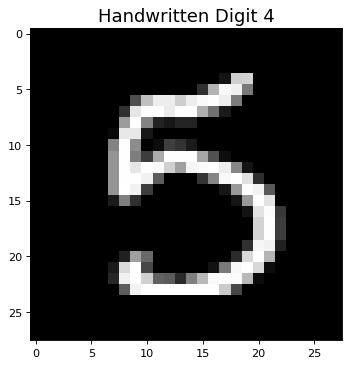

In [6]:
# Display the image of the handwritten digit 4 from the train data frame.
four_pixels = train_df.iloc[3, 1:]
four_pixels = four_pixels.values.reshape(28, 28) # The 'values' attrtibute gets the values of the Pandas series in the form of a NumPy array.

plt.figure(figsize = (5, 5), dpi = 81)
plt.title("Handwritten Digit 4", fontsize = 16)
plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()


If we look at the axes of the above image, we can see that nearly the first four and last three rows are blank. Similarly, the first five and last five columns are blank which is denoted by the black colour. So let's print the rows 5 to 26 and columns 5 to 25 of the `four_pixel` NumPy array to see the pixel values of the image of the handwritten digit 4.

In [7]:
# Print the rows 5 to 26 and columns 5 to 25 of the 'four_pixel' NumPy array to see the pixel values of the image of the handwritten digit 4.
print(four_pixels[4:-2, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0  20 206 210   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  47 179 248 239 122   0   0   0]
 [  0   0   0   0  78 192 237 237 206 237 249 254 239 123   0   0   0   0]
 [  0   0   0  48 229 254 254 235 254 254 174 114  26   0   0   0   0   0]
 [  0   0   0 155 254 132  35  23  35  35   0   0   0   0   0   0   0   0]
 [  0   0   9 232 232  23   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 131 254 140   0  12  63  51  27   0   0   0   0   0   0   0   0]
 [  0   0 149 254 126  61 172 254 254 254 166  82  14   0   0   0   0   0]
 [  0   0 149 254 230 254 250 208 160 245 251 254 237 135  20   0   0   0]
 [  0   0 149 254 254 241  92   0   0   0  52 133 248 254 225  46   0   0]
 [  0   0 149 255 241  61   0   0   0   0   0   0  22 153 254 242  89   0]
 [  0   0  26 127  49   0   0   0   0   0   0   0   0  20 153 254 227   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 228 252  57]
 [  0   0   0   0   0   0

From the above output, we can see the non-zero pixel values arranged in the pattern of digit 4.

**It is to be noted that the pixel values for a grayscale image range from 0 to 255.**

You can also look at the descriptive statistics for the first 10 images in the train data frame.

---


In [8]:
# Set the indices of the 'train_df' data frame temporarily to the values in the 'label' column.
train_df.set_index('label', inplace = False)

KeyError: "None of ['label'] are in the columns"

As we can see, the indices of the `train_df` are the values of the `label` column. To verify whether the change is temporary, we can print the first five rows of the `train_df` data frame again.

Now let's calculate the mean, std, min, quartiles and max values of the pixels of the first 10 images present in the `train_df` data frame.

In [ ]:
# Print descriptive statistics for the pixel values of first 10 images in the train data frame.
train_df.set_index('label').head(10).T.describe() # Setting the 'label' as index column from the data frame.

As we can see, the pixel values for a grayscale image goes from 0 to 255.

Now, to practice the usage of the `imshow()` function, let's create an image of another handwritten digit, say $6$ from the pixel values of its image. For this, first, we will have to get the rows that contain the pixel values of the images of $6$.


In [ ]:
# Create a data frame from the training data frame that contain the pixel values of the images of the digit 6.
six_pixels_train_df = train_df.loc[train_df['label'] == 6, :]
six_pixels_train_df

Now, from the above data frame, let's create an image of the first instance of the image of digit $6$. Its index is 21.

In [ ]:
# Create an image from the pixel values of the image of the digit 6 that are stored in row 21.
six_pixels = train_df.iloc[21, 1:]
six_pixels = six_pixels.values.reshape(28, 28)

plt.figure(figsize = (5, 5), dpi = 81)
plt.title("Digit 6", fontsize = 16)
plt.imshow(six_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

Now, let's print the part of the array containing the pixel values of the above image such that their arrangement resembles the digit 6.

In [ ]:
# S3.8: Print the rows 2 to 22 and columns 5 to 21 of the 'six_pixels' array.
print(six_pixels[2:23, 5:22])

Now, for a machine learning algorithm (in this case, SVM), to correctly identify an image for a digit, it has to figure out the arrangement of pixel values for a digit on a 2D grid (in this case, $28 \times 28$ grid).

Knowing this, we can now build a machine learning model (in this case, SVM) to classify the images of different handwritten digits.


#### Check for Data Imbalance

Before building a classification model, let's check whether the training dataset is imbalanced or not.

In [ ]:
# Find out the counts of records for each digit in the training dataset.
train_df['label'].value_counts(dropna = False, normalize = True) * 100

**Note:**

1. The `dropna = False` parameter counts the number of `NA` or `null` values if they are present in a Pandas series.

2. The `normalize = True` parameter calculates the count of a value as the fraction of the total number of records.

From the count of labels, we can see that the training dataset is balanced. Hence, we can now proceed to build a classification model.

---

### Feature Scaling or Normalisation

Now that we have ensured that there is no data imbalance, let's scale down the pixel values of each image because the support vector machines is sensitive the numeric data. Also, in the case of large values, the time taken to train an SVM model will be high.  

So let's divide each pixel value for each image by 255 (the greatest pixel value for a grayscale image) to reduce the values between 0 and 1.



In [ ]:
# Creating features and target data frames and divide each pixel for each image by 255.0
features = train_df.iloc[:,1:]/255
target = train_df["label"]
features.set_index(keys=target,inplace = False).T.describe()

As we can see, the maximum pixel value of all the images is 1 (or nearly 1) instead of 255 (or 254).



---

###  Model Building

Let's build a preliminary SVM classification model to classify the images of digits.

**Note:** Since there are 42000 training samples (or image samples or rows), the SVC model will take some time (about 4 to 6 minutes) to train.



In [ ]:
# Building an SVC model with the linear kernel.
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(features,target)
svc

Now that we have built a classification model using support vector machines, let's get the predicted digts and them compare the predicted values with the actual values.



In [ ]:
# Predicting the target values for the training set.
y_train_pred = svc.predict(features)
y_train_pred

Now let's create a confusion matrix to check for misclassification.

In [ ]:
# Creating a confusion matrix to check for misclassification.
from sklearn.metrics import classification_report, confusion_matrix
plt.figure(figsize=(12,8))
con_mat = confusion_matrix(target,y_train_pred)
con_df = pd.DataFrame(con_mat)
sns.heatmap(con_df,annot=True,fmt = ".6g")
plt.show()

From the above confusion matrix, we can see that the count of the correct classification of all the digits is on the scale of $10^3$. Compared to them, misclassification counts are negligible.

Let's print the precision, recall and f1-score values to further evaluate the efficacy of the model.

In [ ]:
# Printing the precision, recall and f1-score values to further evaluate the efficacy of the model.
print(classification_report(target,y_train_pred))

The f1-scores for all the labels (or digits) are almost equal to 1. This implies that the SVC model built to classify digits is very accurate. So now let's predict the digits on the test set.

---

### Prediction on Test Set

We already know that the test set does not have a label column. So don't need to separate the features and target variables. But we do need to normalise the features in the test set as well with the same technique used for the train set. Hence, we will divide each pixel value in the test set by 255.



In [ ]:
# Divide each pixel value in the test set by 255. Also, for each image pixels, print the minimum and maximum pixel values.
feat_test = test_df/255
feat_test.T.describe()

Now let's predict the digits for the test set using the SVC model that we just built.

**Note:** The code below may take 3 to 5 minutes to execute.

In [ ]:
# Predicting the digits for the test set using the SVC model built above.
y_test_pred = pd.Series(svc.predict(feat_test))
y_test_pred

Now let's get the count of the predicted labels (or handwritten digits) to see their distribution.

In [ ]:
# Getting the count of the predicted labels (or handwritten digits) to see their distribution.
y_test_pred.value_counts()

It seems that the handwritten digits in the test set are quite uniformly distributed.

---

### Visualising Digits

Let's now visualise at least one-one sample from each digit. But first, let's add a new column called `label` to the `test_df` data frame so that its values are the predicted labels (or digits). Make sure that the column is added to the column index = 0 location.

In [ ]:
# Adding 'label' at column index = 0 to the 'test_df' data frame so that its values are the predicted labels (or digits).
test_df.insert(loc = 0, column="label", value = y_test_pred)

Lets's display the first 5 rows of the modified `test_df` data frame.

In [ ]:
# Display the first 5 rows of the modified 'test_df' data frame.
test_df.head()

Now let's group all the rows of the `test_df` data frame by the `label` column so that pixel values of images of a digit can be clubbed together and a sample of a digit can be retrieved easily later.



In [ ]:
# Group all the rows of the 'test_df' data frame by the 'label' column. Also, get a data frame containing pixel values of images of digit 0.
group_test = test_df.groupby(by="label")
zeros_test_df = group_test.get_group(0)
zeros_test_df

Now, let's create an image from the pixel values of one of the samples of digit 0.

In [ ]:
# Create an image from the pixel values of one of the samples of digit 0.
zeros_pixel = zeros_test_df.iloc[0,1:]
zeros_pixel = zeros_pixel.values.reshape(28,28)

plt.figure(figsize=(14,8))
plt.imshow(zeros_pixel,cmap = "gray",vmin = 0,vmax = 255)
plt.show()

Indeed the predicted image is 0. Let's create an image of one of the sample images of digit three.

In [ ]:
# Get a data frame containing pixel values of all images of digit 3 from 'grouped_test_df' data frame.
three_df = group_test.get_group(3)
three_pixel = three_df.iloc[0,1:]
three_pixel = three_pixel.values.reshape(28,28)


Now, let's create an image of one of the sample images of digit 3.

In [ ]:
# Create an image of one of the sample images of digit 3.
plt.figure(figsize=(14,8))
plt.imshow(three_pixel,cmap = "gray",vmin = 0,vmax = 255)
plt.show()

In [ ]:
# Python function to visualise exactly one sample image of a digit that exists in the 'test_df' data frame. Also, create the images.
def digit_pixel(digit_df,target,digit):
  digit_pixel_df = digit_df.groupby(by=target)
  digit_pixel_df = digit_pixel_df.get_group(digit)
  digit_pixel = digit_pixel_df.iloc[0,1:]
  digit_pixel = digit_pixel.values.reshape(28,28)
  plt.figure(figsize=(14,8))
  plt.imshow(digit_pixel,cmap = "gray",vmin = 0,vmax = 255)
  plt.show()

for digit in range(10):
  digit_pixel(test_df,'label',digit)





#### We have created images for one sample corresponding to each handwritten digit that exists in the `test_df` data frame.

**Note:** A couple of images may be misclassified because the prediction model that we built using the linear kernel of support vector machines is not 100% accurate. Also, we are creating the image of the first sample of a digit that exists in the `test_df` data frame. It may not be necessarily predicted correctly.



----